# R125-bmimBF4: Comparaing Binary Parameters to Temperature 

In [1]:
# import functions
import idaes
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pyomo.environ import (Constraint,
                           Var,
                           ConcreteModel,
                           Expression,
                           Param,
                           Objective,
                           SolverFactory,
                           TransformationFactory,
                           value)

from idaes.core import FlowsheetBlock
import idaes.logger as idaeslog
from pyomo.opt import TerminationCondition, SolverStatus
# Import the Generic Parameter Block
from idaes.generic_models.properties.core.generic.generic_property import (
        GenericParameterBlock)
# Import unit models from the model library
from idaes.generic_models.unit_models import Flash
# Import degrees of freedom tool
from idaes.core.util.model_statistics import degrees_of_freedom
# parmest (binary_param2)
from binary_param2 import binary_params_peng
# import pressure and plot functions
from binary_fitting_functions import calc_outlet_xP
from binary_fitting_functions import plot_sens_analysis

In [2]:
# from HFC32_emimTf2N_PR import configuration
from HFC125_bmimBF4_PR import configuration

In [3]:
#need to make excel csv for 125
data = pd.read_csv('R125_bmimBF4.csv')
# print(data)

In [4]:
# 283
data_283= data[(data.temperature > 282) & (data.temperature< 284)]

# 298
data_298 = data[(data.temperature > 297) & (data.temperature< 299)]
data_298 = data_298.reset_index(drop=True)

# 323
data_323 = data[(data.temperature > 322) & (data.temperature< 324)]
data_323 = data_323.reset_index(drop=True)

# 323
data_348 = data[(data.temperature > 347) & (data.temperature< 349)]
data_348 = data_348.reset_index(drop=True)

In [5]:
m = ConcreteModel()
m.fs = FlowsheetBlock(default={"dynamic": False})
m.fs.properties = GenericParameterBlock(default=configuration)
m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})
DOF_initial = degrees_of_freedom(m)
print('The initial DOF is {0}'.format(DOF_initial))

2021-04-05 23:54:21 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
The initial DOF is 7


## T = 283 K

In [6]:
# print(data_283)

In [7]:
binary_params_peng(data_283, configuration, 'R125', 'bmimBF4', "x_R125", "x_bmimBF4", 
    init_temp =  283.1, init_press =   699600 , init_x_c1 =   0.462, init_x_c2 = 0.538,
    init_kappa_2_1 = 0.311651, init_kappa_1_2 =  0.096037, eps = 0.1, scaling_fac = 1e-9 , read=False)

2021-04-05 23:54:23 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-05 23:54:23 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-05 23:54:23 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-05 23:54:24 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-05 23:54:24 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-05 23:54:24 [INFO] idaes.init.fs.state_

In [8]:
k12_283 = 0.07740707519372475
k21_283 = 0.13385808170213287

In [9]:
R125_x,P= calc_outlet_xP(data,m,"R125", "bmimBF4", k21_283, k12_283,verbose=False)

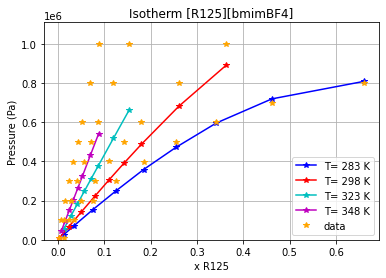

In [10]:
# plots with data - model as lines --- need to make this into a function that splits up the T's
plt.plot(R125_x[0:9],P[0:9],"b*-",label="T= 283 K")  
plt.plot(R125_x[9:18],P[9:18],"r*-",label="T= 298 K") 
plt.plot(R125_x[18:26],P[18:26],"c*-",label="T= 323 K") 
plt.plot(R125_x[26:34],P[26:34],"m*-",label="T= 348 K")
plt.plot(data["x_R125"],data["pressure"],"*",color='orange',label="data")  
plt.title('Isotherm [R125][bmimBF4]')
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R125')
plt.grid(True)
plt.ylim(0,1110000)
plt.legend()
plt.show()

## T = 298 K

In [11]:
print(data_298)

   temperature  pressure  x_R125  x_bmimBF4
0        298.2      9800   0.003      0.997
1        298.2     99600   0.023      0.977
2        298.2    199800   0.050      0.950
3        298.1    299500   0.080      0.920
4        298.2    399800   0.111      0.889
5        298.2    499500   0.143      0.857
6        298.2    599500   0.180      0.820
7        298.2    799600   0.261      0.739
8        298.1    999800   0.363      0.637


In [12]:
binary_params_peng(data_298, configuration, 'R125', 'bmimBF4', "x_R125", "x_bmimBF4", 
    init_temp = 298.2, init_press = 399800, init_x_c1 = 0.111, init_x_c2 = 0.889,
    init_kappa_2_1 = k21_283, init_kappa_1_2 = k12_283, eps = 0.1, scaling_fac = 1e-9, read=False)

2021-04-05 23:55:04 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-05 23:55:05 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-05 23:55:05 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-05 23:55:05 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-05 23:55:05 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-05 23:55:05 [INFO] idaes.init.fs.state_

In [13]:
# k12_298 = 0.12392946195524193
# k21_298 = 0.6777757774640188

k12_298 = 0.11003344624457702
k21_298 = 0.3416826923872634

In [14]:
R125_x,P= calc_outlet_xP(data,m,"R125", "bmimBF4", k21_298, k12_298,verbose=True)
R125_x_298,P_298= calc_outlet_xP(data_298,m,"R125", "bmimBF4", k21_298, k12_298,verbose=True)

    'pyomo.core.base.param.SimpleParam'>) on block fs with a new Component
    (type=<class 'pyomo.core.base.param.SimpleParam'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block fs with a new
    Component (type=<class
    'pyomo.core.base.constraint.AbstractSimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.13.2\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
Infeasible.
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final 

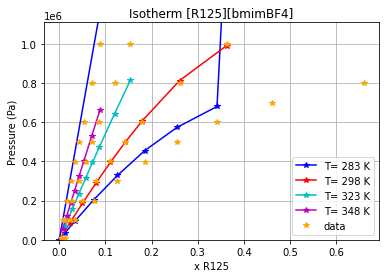

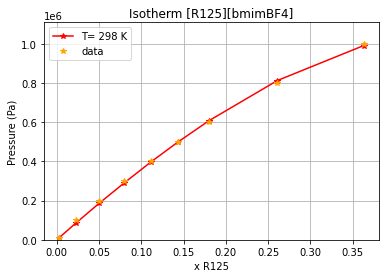

In [15]:
# plots with data - model as lines --- need to make this into a function that splits up the T's
plt.plot(R125_x[0:9],P[0:9],"b*-",label="T= 283 K")  
plt.plot(R125_x[9:18],P[9:18],"r*-",label="T= 298 K") 
plt.plot(R125_x[18:26],P[18:26],"c*-",label="T= 323 K") 
plt.plot(R125_x[26:34],P[26:34],"m*-",label="T= 348 K")
plt.plot(data["x_R125"],data["pressure"],"*",color='orange',label="data")  
plt.title('Isotherm [R125][bmimBF4]')
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R125')
plt.grid(True)
plt.ylim(0,1110000)
plt.legend()
plt.show()

#only 298
plt.plot(R125_x_298,P_298,"r*-",label="T= 298 K") 
plt.plot(data_298["x_R125"],data_298["pressure"],"*",color='orange',label="data")  
plt.title('Isotherm [R125][bmimBF4]')
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R125')
plt.grid(True)
plt.ylim(0,1110000)
plt.legend()
plt.show()

## T = 323 K

In [16]:
print(data_323)

   temperature  pressure  x_R125  x_bmimBF4
0        323.1     99600   0.013      0.987
1        323.1    199800   0.028      0.972
2        323.2    300000   0.042      0.958
3        323.1    399700   0.057      0.943
4        323.2    499900   0.072      0.928
5        323.1    599600   0.087      0.913
6        323.1    799700   0.120      0.880
7        323.1    999600   0.154      0.846


In [17]:
binary_params_peng(data_323, configuration, 'R125', 'bmimBF4', "x_R125", "x_bmimBF4", 
    init_temp = 323.1, init_press = 799700, init_x_c1 = 0.120, init_x_c2 = 0.880,
    init_kappa_2_1 = k21_298, init_kappa_1_2 = k12_298, eps = 0.1, scaling_fac = 1e-9, read=False)

2021-04-05 23:55:55 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-05 23:55:55 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-05 23:55:55 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-05 23:55:55 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-05 23:55:55 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-05 23:55:56 [INFO] idaes.init.fs.state_

In [18]:
k12_323 = 0.1437933422974738
k21_323 = 0.6095379553300515

In [19]:
R125_x,P= calc_outlet_xP(data,m,"R125", "bmimBF4", k21_323, k12_323,verbose=True)
R125_x_323,P_323= calc_outlet_xP(data_323,m,"R125", "bmimBF4", k21_323, k12_323,verbose=True)

    'pyomo.core.base.param.SimpleParam'>) on block fs with a new Component
    (type=<class 'pyomo.core.base.param.SimpleParam'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block fs with a new
    Component (type=<class
    'pyomo.core.base.constraint.AbstractSimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.13.2\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
Infeasible.
The final DOF is 0
    model.name="unknown";
      - termination condition: infeasible

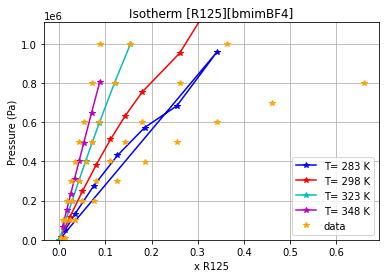

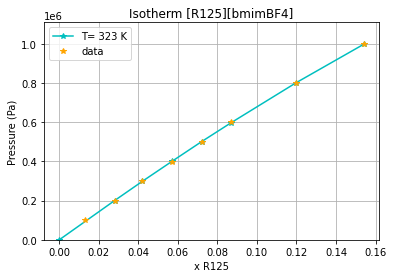

In [20]:
# all t's
plt.plot(R125_x[0:9],P[0:9],"b*-",label="T= 283 K")  
plt.plot(R125_x[9:18],P[9:18],"r*-",label="T= 298 K") 
plt.plot(R125_x[18:26],P[18:26],"c*-",label="T= 323 K") 
plt.plot(R125_x[26:34],P[26:34],"m*-",label="T= 348 K")
plt.plot(data["x_R125"],data["pressure"],"*",color='orange',label="data")  
plt.title('Isotherm [R125][bmimBF4]')
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R125')
plt.grid(True)
plt.ylim(0,1110000)
plt.legend()
plt.show()
# only 323 K
plt.plot(R125_x_323,P_323,"c*-",label="T= 323 K") 
plt.plot(data_323["x_R125"],data_323["pressure"],"*",color='orange',label="data")  
plt.title('Isotherm [R125][bmimBF4]')
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R125')
plt.grid(True)
plt.ylim(0,1110000)
plt.legend()
plt.show()

## T = 348 K

In [ ]:
print(data_348)

In [21]:
binary_params_peng(data_348, configuration, 'R125', 'bmimBF4', "x_R125", "x_bmimBF4", 
    init_temp = 348.2, init_press = 499800, init_x_c1 = 0.043, init_x_c2 = 0.957,
    init_kappa_2_1 = k21_323, init_kappa_1_2 = k12_283, eps = 0.1, scaling_fac = 1e-9, read=False)

2021-04-05 23:56:50 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-05 23:56:51 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-05 23:56:51 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-05 23:56:51 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-05 23:56:51 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-05 23:56:51 [INFO] idaes.init.fs.state_

In [22]:
k12_348 = 0.17921547122111406
k21_348 = 0.964696590244287

In [23]:
R125_x_348, P_348= calc_outlet_xP(data_348,m,"R125", "bmimBF4", k21_348, k12_348,verbose=True)
# R125_x,P= calc_outlet_xP(data,m,"R125", "bmimBF4", k21_348, k12_348, verbose=True)

    'pyomo.core.base.param.SimpleParam'>) on block fs with a new Component
    (type=<class 'pyomo.core.base.param.SimpleParam'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block fs with a new
    Component (type=<class
    'pyomo.core.base.constraint.AbstractSimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0


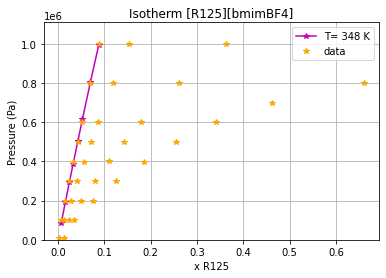

In [24]:
# All T's
# plt.plot(R125_x[0:9],P[0:9],"b*-",label="T= 283 K")  
# plt.plot(R125_x[9:18],P[9:18],"r*-",label="T= 298 K") 
# plt.plot(R125_x[18:26],P[18:26],"c*-",label="T= 323 K") 
plt.plot(R125_x_348,P_348,"m*-",label="T= 348 K") 
plt.plot(data["x_R125"],data["pressure"],"*",color='orange',label="data")  
plt.title('Isotherm [R125][bmimBF4]')
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R125')
plt.grid(True)
plt.ylim(0,1110000)
plt.legend()
plt.show()

# #only 348
# plt.plot(R125_x_348,P_348,"m*-",label="T= 348 K") 
# plt.plot(data_348["x_R125"],data_348["pressure"],"*",color='orange',label="data")  
# plt.title('Isotherm [R125][bmimBF4]')
# plt.ylabel('Pressure (Pa)')
# plt.xlabel('x R125')
# plt.grid(True)
# plt.ylim(0,1110000)
# plt.legend()
# plt.show()

# kappa vs T

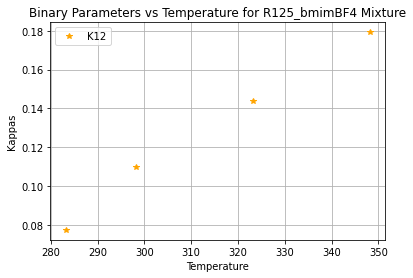

K12 Values for T=  [283.2 298.2 323.2 348.2] are: 
[0.07740708 0.11003345 0.14379334 0.17921547]


In [25]:
K12 = np.array([k12_283, k12_298, k12_323, k12_348])
T = np.array([283.2, 298.2, 323.2, 348.2]) #K
plt.plot(T,K12,"*",color='orange',label="K12") 
plt.title('Binary Parameters vs Temperature for R125_bmimBF4 Mixture')
plt.ylabel('Kappas')
plt.xlabel('Temperature')
plt.grid(True)
plt.legend()
plt.show()

print('K12 Values for T= ', T, 'are: ')
print(K12)

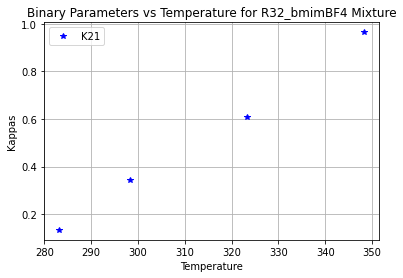

K21 Values for T=  [283.2 298.2 323.2 348.2] are: 
[0.13385808 0.34168269 0.60953796 0.96469659]


In [26]:
K21 = np.array([k21_283, k21_298, k21_323, k21_348])
plt.plot(T,K21,"*",color='blue',label="K21")
plt.title('Binary Parameters vs Temperature for R32_bmimBF4 Mixture')
plt.ylabel('Kappas')
plt.xlabel('Temperature')
plt.grid(True)
plt.legend()
plt.show()

print('K21 Values for T= ', T, 'are: ')
print(K21)

## Best Fit

In [ ]:
# k12 = 0.07740707519372475
# k21 = 0.13385808170213287
print(data)

In [27]:
binary_params_peng(data, configuration, 'R125', 'bmimBF4', "x_R125", "x_bmimBF4", 
    init_temp = 398.2, init_press =  299500, init_x_c1 =  0.080, init_x_c2 =  0.920,
    init_kappa_2_1 = 0.292, init_kappa_1_2 = 0.115, eps = 0.1, scaling_fac = 1e-9, read=False)

2021-04-05 23:57:20 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-05 23:57:21 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-05 23:57:21 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-05 23:57:21 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-05 23:57:21 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-05 23:57:21 [INFO] idaes.init.fs.state_

2021-04-05 23:57:28 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-05 23:57:28 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-05 23:57:28 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-05 23:57:29 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-05 23:57:29 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-05 23:57:29 [INFO] idaes.init.fs.state_

  69r 7.6761319e+02 1.80e-01 1.60e+03   0.2 3.06e+02  -0.0 1.95e-02 3.09e-02f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70r 7.6761319e+02 1.79e-01 1.56e+03   0.2 2.66e+01  -0.5 2.56e-01 5.82e-03f  1
  71r 7.6761319e+02 3.46e+00 1.42e+03   0.2 1.59e+02  -1.0 2.96e-02 1.06e-01f  1
  72r 7.6760655e+02 1.50e+01 2.56e+03   0.2 2.24e+03    -  5.60e-02 3.96e-02f  1
  73r 7.6760655e+02 1.50e+01 1.10e+04   0.2 4.26e+00   6.9 2.41e-04 3.33e-04h  1
  74r 7.6760655e+02 1.50e+01 1.27e+04   0.2 5.48e+00   6.4 3.99e-04 1.28e-04h  1
  75r 7.6760655e+02 1.50e+01 2.01e+04   0.2 5.60e+00   5.9 1.58e-03 1.60e-03h  1
  76r 7.6760655e+02 1.49e+01 3.34e+04   0.2 5.64e+00   5.4 2.80e-03 8.66e-03h  1
  77r 7.6760655e+02 1.49e+01 5.40e+04   0.2 5.57e+00   5.9 1.40e-02 5.05e-03h  1
  78r 7.6760655e+02 1.43e+01 1.39e+05   0.2 5.54e+00   5.4 7.90e-02 6.48e-02h  1
  79r 7.6760655e+02 1.39e+01 2.76e+05   0.2 5.18e+00   5.8 6.32e-02 4.22e-02h  1
iter    objective    inf_pr 

 207r 7.6751113e+02 2.14e-01 9.74e+03  -1.9 9.48e-06   9.1 1.00e+00 1.00e+00f  1
 208r 7.6751113e+02 2.14e-01 1.32e+04  -1.9 1.85e-02   8.6 1.23e-03 5.84e-04h  1
 209r 7.6751113e+02 2.14e-01 7.60e+04  -1.9 5.30e-02   8.1 2.37e-03 1.06e-03h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 210r 7.6751113e+02 2.12e-01 3.46e+04  -1.9 5.47e-02   7.6 2.64e-03 8.45e-03h  1
 211r 7.6751113e+02 2.07e-01 1.52e+05  -1.9 5.43e-02   7.2 1.10e-02 3.63e-02h  1
 212r 7.6751113e+02 1.84e-01 2.86e+05  -1.9 5.20e-02   6.7 4.72e-02 1.53e-01h  1
 213r 7.6751113e+02 1.19e-01 1.84e+05  -1.9 4.30e-02   6.2 2.39e-01 4.98e-01h  1
 214r 7.6751113e+02 1.00e-01 3.40e+05  -1.9 2.07e-02   5.7 1.00e+00 2.96e-01h  1
 215r 7.6751113e+02 9.45e-02 3.61e+05  -1.9 1.72e-02   5.3 1.00e+00 1.15e-01h  1
 216r 7.6751113e+02 9.07e-02 6.17e+03  -1.9 1.30e-02   5.7 1.00e+00 1.00e+00h  1
 217r 7.6751113e+02 9.07e-02 4.26e+04  -1.9 6.91e-03   5.2 1.00e+00 6.62e-02f  1
 218r 7.6751113e+02 9.07e-02

 344r 7.6729510e+02 1.33e-01 6.36e+02  -1.9 3.30e-02   3.6 9.31e-02 6.89e-02f  1
 345r 7.6729510e+02 1.29e-01 5.05e+02  -1.9 1.12e-02   4.0 1.00e+00 4.47e-01f  1
 346r 7.6729510e+02 1.11e-01 2.39e+02  -1.9 3.31e-02   3.5 2.01e-01 6.20e-01f  1
 347r 7.6729510e+02 1.11e-01 1.61e+02  -1.9 2.06e+00   3.1 2.83e-02 1.45e-02f  1
 348r 7.6729510e+02 1.24e-01 1.81e+02  -1.9 6.18e-02   3.5 5.18e-01 2.76e-01f  1
 349r 7.6729510e+02 1.46e-01 2.08e+03  -1.9 1.21e+00   3.0 7.24e-02 3.29e-03f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 350r 7.6729510e+02 1.12e-01 2.35e+03  -1.9 1.32e-01   3.4 1.00e+00 3.66e-01f  1
 351r 7.6729510e+02 1.13e-01 6.98e+02  -1.9 3.99e-02   3.9 5.72e-01 2.88e-02h  1
 352r 7.6729510e+02 1.35e-01 3.26e+02  -1.9 9.70e-02   3.4 1.00e+00 2.89e-01h  1
 353r 7.6729510e+02 1.35e-01 3.96e+02  -1.9 5.22e-02   2.9 1.86e-01 1.06e-02h  1
 354r 7.6729510e+02 7.87e-02 1.67e+03  -1.9 4.39e-02   3.3 1.00e+00 7.10e-01H  1
 355r 7.6729510e+02 6.68e-02

 437r 7.6729090e+02 7.79e-02 2.00e+04  -1.9 1.20e-07  11.4 1.00e+00 3.12e-02f  6
 438r 7.6729090e+02 7.79e-02 1.89e+04  -1.9 2.45e-07  10.9 1.00e+00 1.56e-02f  7
 439r 7.6729090e+02 7.79e-02 1.87e+04  -1.9 4.05e-07  10.4 1.00e+00 1.56e-02f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 440r 7.6729090e+02 7.79e-02 1.86e+04  -1.9 7.39e-07   9.9 1.00e+00 7.81e-03f  8
 441r 7.6729090e+02 3.87e-01 3.33e+03  -1.9 1.18e-06   9.5 1.00e+00 1.00e+00f  1
 442r 7.6729090e+02 7.79e-02 5.44e+03  -1.9 5.97e-02   9.0 3.74e-04 1.89e-04h  1
 443r 7.6729090e+02 7.79e-02 1.89e+03  -1.9 5.99e-06   8.5 1.00e+00 1.00e+00f  1
 444r 7.6729090e+02 7.79e-02 8.48e+02  -1.9 8.07e-06   8.0 1.00e+00 1.00e+00f  1
 445r 7.6729090e+02 3.87e-01 2.81e+03  -1.9 2.19e-05   7.5 1.00e+00 1.00e+00f  1
 446r 7.6729090e+02 7.79e-02 2.76e+03  -1.9 6.95e-02   7.1 1.06e-03 3.98e-04h  1
 447r 7.6729090e+02 7.79e-02 7.26e+02  -1.9 1.87e-04   6.6 1.00e+00 1.00e+00f  1
 448r 7.6729090e+02 7.79e-02

 574r 7.6729090e+02 1.17e-01 1.99e+09  -1.9 4.39e-03   9.8 6.75e-02 2.15e-02h  1
 575r 7.6729090e+02 1.17e-01 1.01e+09  -1.9 4.80e-03   9.3 4.52e-01 2.93e-01h  1
 576r 7.6729090e+02 1.17e-01 3.13e+08  -1.9 4.37e-03   8.8 5.50e-01 1.93e-01h  1
 577r 7.6729090e+02 1.17e-01 2.46e+08  -1.9 4.73e-02   8.4 1.02e-01 2.25e-03h  1
 578r 7.6729090e+02 1.17e-01 1.01e+08  -1.9 3.34e-03   8.8 7.21e-01 2.98e-01h  1
 579r 7.6729090e+02 1.18e-01 1.12e+08  -1.9 5.69e-03   8.3 8.50e-01 4.03e-01h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 580r 7.6729090e+02 1.18e-01 1.03e+08  -1.9 1.13e-03   8.7 9.94e-01 2.29e-01h  1
 581r 7.6729090e+02 1.18e-01 7.79e+07  -1.9 1.13e-03   8.3 8.49e-01 2.50e-01h  3
 582r 7.6729090e+02 1.18e-01 7.40e+07  -1.9 4.14e-03   7.8 3.04e-01 5.37e-02f  1
 583r 7.6729090e+02 1.18e-01 5.55e+07  -1.9 7.30e-04   8.2 1.00e+00 2.50e-01h  3
 584r 7.6729090e+02 1.18e-01 4.20e+07  -1.9 1.18e-03   7.7 6.36e-01 2.46e-01h  3
 585r 7.6729090e+02 1.18e-01

 712r 7.6723967e+02 4.63e-01 3.98e+05  -1.9 5.54e-03   6.1 1.00e+00 6.85e-01h  1
 713r 7.6723967e+02 4.63e-01 7.64e+02  -1.9 1.90e-03   5.6 1.00e+00 1.00e+00h  1
 714r 7.6723967e+02 4.63e-01 2.32e+03  -1.9 4.40e-03   5.1 1.00e+00 2.71e-01f  1
 715r 7.6723967e+02 4.62e-01 1.79e+03  -1.9 1.26e-02   4.7 1.00e+00 2.68e-01f  1
 716r 7.6723967e+02 4.61e-01 1.86e+03  -1.9 2.36e-02   4.2 4.62e-01 4.46e-02f  1
 717r 7.6723967e+02 4.59e-01 1.87e+03  -1.9 4.84e-02   3.7 2.89e-01 6.98e-02f  1
 718r 7.6723967e+02 4.56e-01 1.34e+03  -1.9 1.25e-02   4.1 6.39e-01 2.46e-01f  1
 719r 7.6723967e+02 4.19e-01 1.61e+02  -1.9 3.65e-02   3.6 3.11e-01 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 720r 7.6723967e+02 4.19e-01 1.62e+02  -1.9 2.66e+01   3.2 1.32e-03 1.49e-03f  1
 721r 7.6723967e+02 4.19e-01 3.11e+02  -1.9 5.59e-02   3.6 8.26e-01 8.16e-03f  1
 722r 7.6723967e+02 4.03e-01 1.65e+02  -1.9 1.57e-02   4.0 1.00e+00 1.00e+00f  1
 723r 7.6723967e+02 3.96e-01

 850r 7.6747218e+02 4.40e-01 1.65e+03  -1.9 9.26e+02    -  7.33e-01 1.00e+00h  1
 851r 7.6744816e+02 3.08e-01 7.66e+02  -1.9 1.35e+03    -  7.85e-02 1.53e-01f  1
 852r 7.6743325e+02 1.86e-01 5.39e+02  -1.9 1.55e+03    -  3.37e-01 2.04e-01f  1
 853r 7.6741971e+02 3.98e-01 6.19e+02  -1.9 5.72e+02    -  4.02e-01 3.07e-01f  1
 854r 7.6741914e+02 3.90e-01 1.37e+03  -1.9 8.01e+03    -  3.68e-04 1.96e-02f  1
 855r 7.6741914e+02 3.89e-01 1.63e+03  -1.9 2.76e+00   2.8 2.91e-03 6.92e-04h  1
 856r 7.6741914e+02 3.87e-01 1.97e+03  -1.9 3.70e+00   2.4 3.89e-04 6.61e-03h  1
 857r 7.6741914e+02 3.83e-01 4.64e+03  -1.9 2.48e+00   1.9 4.18e-03 9.47e-03h  1
 858r 7.6741914e+02 3.25e-01 4.24e+03  -1.9 3.65e+00   1.4 8.29e-03 1.51e-01h  1
 859r 7.6741914e+02 2.58e-01 3.30e+03  -1.9 3.15e+00   0.9 1.51e-01 2.07e-01h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 860r 7.6741914e+02 2.57e-01 3.37e+03  -1.9 2.12e+00   0.5 1.66e-01 2.64e-03h  1
 861r 7.6741914e+02 2.57e-01

 988r 7.6728193e+02 5.87e-02 7.39e+04  -1.9 1.19e-02   8.1 2.11e-02 2.55e-02h  1
 989r 7.6728193e+02 5.87e-02 7.72e+04  -1.9 1.16e-02   7.7 5.31e-02 7.03e-03h  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 990r 7.6728193e+02 5.87e-02 4.15e+06  -1.9 1.15e-02   9.9 3.82e-02 9.71e-04h  1
 991r 7.6728193e+02 5.87e-02 6.32e+06  -1.9 1.15e-02   9.4 9.31e-02 2.33e-02h  1
 992r 7.6728193e+02 5.87e-02 6.35e+06  -1.9 1.12e-02   8.9 3.39e-02 1.12e-02H  1
 993r 7.6728193e+02 5.87e-02 6.25e+06  -1.9 1.11e-02   9.4 1.31e-03 4.33e-03h  1
 994r 7.6728193e+02 5.87e-02 6.32e+06  -1.9 1.11e-02   8.9 2.34e-02 1.47e-04H  1
 995r 7.6728193e+02 5.87e-02 4.92e+06  -1.9 1.11e-02   9.3 3.94e-04 5.31e-02h  2
 996r 7.6728193e+02 5.87e-02 4.96e+06  -1.9 1.04e-02   8.8 3.82e-02 3.71e-04H  1
 997r 7.6728193e+02 5.87e-02 4.76e+06  -1.9 1.05e-02   9.3 7.01e-04 9.95e-03h  4
 998r 7.6728193e+02 5.87e-02 1.17e+07  -1.9 1.04e-02   9.7 1.31e-01 2.63e-03h  2
 999r 7.6728193e+02 5.87e-02

1080r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.30e-09  12.1 1.00e+00 2.27e-13h 43
1081r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 5.30e-09  11.6 1.00e+00 5.68e-14h 45
1082r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.46e-09  12.1 1.00e+00 2.27e-13h 43
1083r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 7.40e-09  11.6 1.00e+00 5.68e-14h 45
1084r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.65e-09  12.0 1.00e+00 1.14e-13h 44
1085r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.14e-08  11.5 1.00e+00 5.68e-14h 45
1086r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.85e-09  12.0 1.00e+00 1.14e-13h 44
1087r 7.6728193e+02 9.56e-02 6.71e+03  -1.9 2.21e-08  11.5 1.00e+00 1.00e+00w  1
1088r 7.6728193e+02 5.87e-02 5.29e+05  -1.9 1.39e-02  11.0 1.46e-03 7.54e-04w  1
1089r 7.6728193e+02 5.87e-02 1.75e+05  -1.9 4.89e-06  10.5 1.24e-01 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1090r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.38e-07  10.1 1.00e+00 5.68e-14h 44
1091r 7.6728193e+02 5.87e-02

1218r 7.6728193e+02 5.87e-02 1.03e+06  -1.9 1.39e-02  11.3 1.46e-03 7.53e-04w  1
1219r 7.6728193e+02 5.87e-02 3.31e+05  -1.9 4.84e-06  10.8 1.03e-01 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1220r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 7.40e-08  10.3 1.00e+00 1.14e-13h 43
1221r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 4.44e-09  11.7 1.00e+00 5.68e-14h 45
1222r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.36e-09  12.1 1.00e+00 2.27e-13h 43
1223r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 5.97e-09  11.6 1.00e+00 5.68e-14h 45
1224r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.53e-09  12.0 1.00e+00 1.14e-13h 44
1225r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 8.60e-09  11.6 1.00e+00 5.68e-14h 45
1226r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.72e-09  12.0 1.00e+00 1.14e-13h 44
1227r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.41e-08  11.5 1.00e+00 5.68e-14h 45
1228r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.94e-09  11.9 1.00e+00 1.14e-13h 44
1229r 7.6728193e+02 5.87e-02

1356r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 8.89e-10  12.3 1.00e+00 2.27e-13h 43
1357r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 2.67e-09  11.8 1.00e+00 1.14e-13h 44
1358r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.00e-09  12.2 1.00e+00 2.27e-13h 43
1359r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 3.00e-09  11.8 1.00e+00 5.68e-14h 45
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1360r 7.6728193e+02 9.56e-02 1.70e+03  -1.9 1.13e-09  12.2 1.00e+00 1.00e+00w  1
1361r 7.6728193e+02 5.87e-02 2.63e+06  -1.9 1.39e-02  11.7 1.46e-03 7.53e-04w  1
1362r 7.6728193e+02 5.87e-02 8.22e+05  -1.9 4.80e-06  11.2 9.00e-02 1.00e+00w  1
1363r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 2.98e-08  10.7 1.00e+00 2.27e-13h 42
1364r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.42e-09  12.1 1.00e+00 2.27e-13h 43
1365r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 6.79e-09  11.6 1.00e+00 5.68e-14h 45
1366r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.60e-09  12.0 1.00e+00 1.14e-13h 44
1367r 7.6728193e+02 5.87e-02

1494r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 3.70e-08  11.5 1.00e+00 5.68e-14h 45
1495r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 2.20e-09  11.9 1.00e+00 1.14e-13h 44
1496r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 8.27e-10  12.3 1.00e+00 2.27e-13h 43
1497r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 2.48e-09  11.8 1.00e+00 1.14e-13h 44
1498r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 9.30e-10  12.3 1.00e+00 2.27e-13h 43
1499r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 2.79e-09  11.8 1.00e+00 1.14e-13h 44
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1500r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.05e-09  12.2 1.00e+00 2.27e-13h 43
1501r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 3.26e-09  11.7 1.00e+00 5.68e-14h 45
1502r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.18e-09  12.2 1.00e+00 2.27e-13h 43
1503r 7.6728193e+02 9.56e-02 1.70e+03  -1.9 4.17e-09  11.7 1.00e+00 1.00e+00w  1
1504r 7.6728193e+02 5.87e-02 8.36e+05  -1.9 1.39e-02  11.2 1.46e-03 7.53e-04w  1
1505r 7.6728193e+02 5.87e-02

1631r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.62e-09  12.0 1.00e+00 1.14e-13h 44
1632r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.06e-08  11.5 1.00e+00 5.68e-14h 45
1633r 7.6728193e+02 9.56e-02 1.70e+03  -1.9 1.82e-09  12.0 1.00e+00 1.00e+00w  1
1634r 7.6728193e+02 5.87e-02 1.62e+06  -1.9 1.39e-02  11.5 1.46e-03 7.53e-04w  1
1635r 7.6728193e+02 5.87e-02 5.13e+05  -1.9 4.82e-06  11.0 9.52e-02 1.00e+00w  1
1636r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 4.78e-08  10.5 1.00e+00 1.14e-13h 43
1637r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 2.30e-09  11.9 1.00e+00 1.14e-13h 44
1638r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 8.65e-10  12.3 1.00e+00 2.27e-13h 43
1639r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 2.59e-09  11.8 1.00e+00 1.14e-13h 44
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1640r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 9.73e-10  12.2 1.00e+00 2.27e-13h 43
1641r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 2.92e-09  11.8 1.00e+00 1.14e-13h 44
1642r 7.6728193e+02 5.87e-02

1724r 7.6728193e+02 9.56e-02 1.70e+03  -1.9 2.14e-09  11.9 1.00e+00 1.00e+00w  1
1725r 7.6728193e+02 5.87e-02 1.38e+06  -1.9 1.39e-02  11.4 1.46e-03 7.53e-04w  1
1726r 7.6728193e+02 5.87e-02 4.39e+05  -1.9 4.83e-06  10.9 9.76e-02 1.00e+00w  1
1727r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 5.58e-08  10.5 1.00e+00 1.14e-13h 43
1728r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 2.70e-09  11.8 1.00e+00 1.14e-13h 44
1729r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.02e-09  12.2 1.00e+00 2.27e-13h 43
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1730r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 3.08e-09  11.7 1.00e+00 5.68e-14h 45
1731r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.14e-09  12.2 1.00e+00 2.27e-13h 43
1732r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 3.90e-09  11.7 1.00e+00 5.68e-14h 45
1733r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.28e-09  12.1 1.00e+00 2.27e-13h 43
1734r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 5.12e-09  11.6 1.00e+00 5.68e-14h 45
1735r 7.6728193e+02 5.87e-02

1861r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 9.42e-09  11.6 1.00e+00 5.68e-14h 45
1862r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.77e-09  12.0 1.00e+00 1.14e-13h 44
1863r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.62e-08  11.5 1.00e+00 5.68e-14h 45
1864r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.99e-09  11.9 1.00e+00 1.14e-13h 44
1865r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 4.46e-08  11.5 1.00e+00 2.84e-14h 46
1866r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 2.24e-09  11.9 1.00e+00 1.14e-13h 44
1867r 7.6728193e+02 9.56e-02 1.70e+03  -1.9 8.39e-10  12.3 1.00e+00 1.00e+00w  1
1868r 7.6728193e+02 5.87e-02 3.52e+06  -1.9 1.39e-02  11.8 1.46e-03 7.53e-04w  1
1869r 7.6728193e+02 5.87e-02 1.10e+06  -1.9 4.80e-06  11.4 8.79e-02 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1870r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 2.23e-08  10.9 1.00e+00 2.27e-13h 42
1871r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.06e-09  12.2 1.00e+00 2.27e-13h 43
1872r 7.6728193e+02 5.87e-02

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2000r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 8.85e-08  10.3 1.00e+00 5.68e-14h 44
2001r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 7.33e-09  11.6 1.00e+00 5.68e-14h 45
2002r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.64e-09  12.0 1.00e+00 1.14e-13h 44
2003r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.13e-08  11.5 1.00e+00 5.68e-14h 45
2004r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.85e-09  12.0 1.00e+00 1.14e-13h 44
2005r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 2.16e-08  11.5 1.00e+00 5.68e-14h 45
2006r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 2.08e-09  11.9 1.00e+00 1.14e-13h 44
2007r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.16e-07  11.4 1.00e+00 2.84e-14h 46
2008r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 2.34e-09  11.9 1.00e+00 1.14e-13h 44
2009r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 8.77e-10  12.3 1.00e+00 2.27e-13h 43
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2010r 7.6728193e+02 9.56e-02

2138r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.21e-09  12.1 1.00e+00 2.27e-13h 43
2139r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 4.41e-09  11.7 1.00e+00 5.68e-14h 45
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2140r 7.6728193e+02 9.56e-02 1.70e+03  -1.9 1.36e-09  12.1 1.00e+00 1.00e+00w  1
2141r 7.6728193e+02 5.87e-02 2.18e+06  -1.9 1.39e-02  11.6 1.46e-03 7.53e-04w  1
2142r 7.6728193e+02 5.87e-02 6.84e+05  -1.9 4.81e-06  11.1 9.18e-02 1.00e+00w  1
2143r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 3.59e-08  10.7 1.00e+00 2.27e-13h 42
2144r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.72e-09  12.0 1.00e+00 1.14e-13h 44
2145r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.39e-08  11.5 1.00e+00 5.68e-14h 45
2146r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.93e-09  11.9 1.00e+00 1.14e-13h 44
2147r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 3.18e-08  11.5 1.00e+00 5.68e-14h 45
2148r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 2.17e-09  11.9 1.00e+00 1.14e-13h 44
2149r 7.6728193e+02 5.87e-02

2275r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 2.66e-09  11.8 1.00e+00 1.14e-13h 44
2276r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 9.97e-10  12.2 1.00e+00 2.27e-13h 43
2277r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 2.99e-09  11.8 1.00e+00 5.68e-14h 45
2278r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.12e-09  12.2 1.00e+00 2.27e-13h 43
2279r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 3.76e-09  11.7 1.00e+00 5.68e-14h 45
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2280r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.26e-09  12.1 1.00e+00 2.27e-13h 43
2281r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 4.91e-09  11.7 1.00e+00 5.68e-14h 45
2282r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.42e-09  12.1 1.00e+00 2.27e-13h 43
2283r 7.6728193e+02 9.56e-02 1.70e+03  -1.9 6.73e-09  11.6 1.00e+00 1.00e+00w  1
2284r 7.6728193e+02 5.87e-02 6.93e+05  -1.9 1.39e-02  11.1 1.46e-03 7.53e-04w  1
2285r 7.6728193e+02 5.87e-02 2.26e+05  -1.9 4.87e-06  10.6 1.13e-01 1.00e+00w  1
2286r 7.6728193e+02 5.87e-02

2413r 7.6728193e+02 9.56e-02 1.70e+03  -1.9 2.20e-09  11.9 1.00e+00 1.00e+00w  1
2414r 7.6728193e+02 5.87e-02 1.34e+06  -1.9 1.39e-02  11.4 1.46e-03 7.53e-04w  1
2415r 7.6728193e+02 5.87e-02 4.28e+05  -1.9 4.83e-06  10.9 9.80e-02 1.00e+00w  1
2416r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 5.73e-08  10.5 1.00e+00 1.14e-13h 43
2417r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 2.78e-09  11.8 1.00e+00 1.14e-13h 44
2418r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.04e-09  12.2 1.00e+00 2.27e-13h 43
2419r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 3.24e-09  11.7 1.00e+00 5.68e-14h 45
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2420r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.17e-09  12.2 1.00e+00 2.27e-13h 43
2421r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 4.14e-09  11.7 1.00e+00 5.68e-14h 45
2422r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.32e-09  12.1 1.00e+00 2.27e-13h 43
2423r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 5.49e-09  11.6 1.00e+00 5.68e-14h 45
2424r 7.6728193e+02 5.87e-02

2551r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.82e-09  12.0 1.00e+00 1.14e-13h 44
2552r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.91e-08  11.5 1.00e+00 5.68e-14h 45
2553r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 2.04e-09  11.9 1.00e+00 1.14e-13h 44
2554r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 7.15e-08  11.4 1.00e+00 2.84e-14h 46
2555r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 2.30e-09  11.9 1.00e+00 1.14e-13h 44
2556r 7.6728193e+02 9.56e-02 1.70e+03  -1.9 8.62e-10  12.3 1.00e+00 1.00e+00w  1
2557r 7.6728193e+02 5.87e-02 3.43e+06  -1.9 1.39e-02  11.8 1.46e-03 7.53e-04w  1
2558r 7.6728193e+02 5.87e-02 1.07e+06  -1.9 4.80e-06  11.3 8.80e-02 1.00e+00w  1
2559r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 2.30e-08  10.9 1.00e+00 2.27e-13h 42
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2560r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.09e-09  12.2 1.00e+00 2.27e-13h 43
2561r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 3.55e-09  11.7 1.00e+00 5.68e-14h 45
2562r 7.6728193e+02 5.87e-02

2689r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 9.08e-08  10.2 1.00e+00 5.68e-14h 44
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2690r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 8.01e-09  11.6 1.00e+00 5.68e-14h 45
2691r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.69e-09  12.0 1.00e+00 1.14e-13h 44
2692r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.27e-08  11.5 1.00e+00 5.68e-14h 45
2693r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.90e-09  12.0 1.00e+00 1.14e-13h 44
2694r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 2.69e-08  11.5 1.00e+00 5.68e-14h 45
2695r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 2.14e-09  11.9 1.00e+00 1.14e-13h 44
2696r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.90e-06  11.4 1.00e+00 2.84e-14h 46
2697r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 2.40e-09  11.8 1.00e+00 1.14e-13h 44
2698r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 9.01e-10  12.3 1.00e+00 2.27e-13h 43
2699r 7.6728193e+02 9.56e-02 1.70e+03  -1.9 2.70e-09  11.8 1.00e+00 1.00e+00w  1
iter    objective    inf_pr 

2781r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.59e-08  11.5 1.00e+00 5.68e-14h 45
2782r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.98e-09  11.9 1.00e+00 1.14e-13h 44
2783r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 4.28e-08  11.5 1.00e+00 2.84e-14h 46
2784r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 2.23e-09  11.9 1.00e+00 1.14e-13h 44
2785r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 8.36e-10  12.3 1.00e+00 2.27e-13h 43
2786r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 2.51e-09  11.8 1.00e+00 1.14e-13h 44
2787r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 9.41e-10  12.3 1.00e+00 2.27e-13h 43
2788r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 2.82e-09  11.8 1.00e+00 1.14e-13h 44
2789r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.06e-09  12.2 1.00e+00 2.27e-13h 43
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2790r 7.6728193e+02 9.56e-02 1.70e+03  -1.9 3.34e-09  11.7 1.00e+00 1.00e+00w  1
2791r 7.6728193e+02 5.87e-02 9.30e+05  -1.9 1.39e-02  11.3 1.46e-03 7.53e-04w  1
2792r 7.6728193e+02 5.87e-02

2919r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 7.26e-09  11.6 1.00e+00 5.68e-14h 45
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2920r 7.6728193e+02 9.56e-02 1.70e+03  -1.9 1.64e-09  12.0 1.00e+00 1.00e+00w  1
2921r 7.6728193e+02 5.87e-02 1.80e+06  -1.9 1.39e-02  11.5 1.46e-03 7.53e-04w  1
2922r 7.6728193e+02 5.87e-02 5.69e+05  -1.9 4.82e-06  11.1 9.39e-02 1.00e+00w  1
2923r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 4.31e-08  10.6 1.00e+00 1.14e-13h 43
2924r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 2.07e-09  11.9 1.00e+00 1.14e-13h 44
2925r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 1.05e-07  11.4 1.00e+00 2.84e-14h 46
2926r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 2.33e-09  11.9 1.00e+00 1.14e-13h 44
2927r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 8.75e-10  12.3 1.00e+00 2.27e-13h 43
2928r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 2.62e-09  11.8 1.00e+00 1.14e-13h 44
2929r 7.6728193e+02 5.87e-02 1.70e+03  -1.9 9.84e-10  12.2 1.00e+00 2.27e-13h 43
iter    objective    inf_pr 

KeyboardInterrupt: 

In [ ]:
k12 = 0.1152474671413
k21 = 0.29197450276

In [ ]:
R125_x,P= calc_outlet_xP(data,m,"R125", "bmimBF4", k21, k12,verbose=True)

In [ ]:
# plots with data - model as lines --- need to make this into a function that splits up the T's
plt.plot(R125_x[0:9],P[0:9],"b*-",label="T= 283 K")  
plt.plot(R125_x[9:18],P[9:18],"r*-",label="T= 298 K") 
plt.plot(R125_x[18:26],P[18:26],"c*-",label="T= 323 K") 
plt.plot(R125_x[26:34],P[26:34],"m*-",label="T= 348 K")
plt.plot(data["x_R125"],data["pressure"],"*",color='orange',label="data")  
plt.title('Isotherm [R125][bmimBF4]')
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R125')
plt.grid(True)
plt.ylim(0,1110000)
plt.legend()
plt.show()